In [1]:
import pandas as pd
import numpy as np
import io

In [2]:
!pip install -U -q PyDrive

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
file_list = drive.ListFile({'q': "'1yZd6QgVYytNv6Ng4J0InfK4naGxjOA79' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: DS_Assignment2_M_or_F (1).ipynb, id: 1Zd6dezJyiZVPWotwnRWYkOVKaBeNK1oQ
title: Untitled, id: 1fFBoHh_wYFLV657PGYTiaueuo4DLheU9
title: gender_predict.ipynb, id: 1NnNwyy5OsH4rtzqoOT1EIKpCmbhP4gbx
title: Boy_or_girl_train 2022.csv, id: 1SQ6gAxtjPGg0ebJbC4kjSmyuOhfATYlD


In [5]:
csv_from_gdrive = drive.CreateFile({'id': '1SQ6gAxtjPGg0ebJbC4kjSmyuOhfATYlD'})
csv_from_gdrive.GetContentFile('data.csv')

In [6]:
df = pd.read_csv('data.csv')

In [7]:
df[0:10]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,4/7/2017 13:47,2,處女座,Apple,154.0,43.0,2,180.0,583.0,0,Beautiful
1,2,4/7/2017 13:48,2,處女座,Apple,156.0,47.0,2,130.0,400.0,3.5,Enjoying being who I'm notsss
2,3,4/7/2017 13:49,1,射手座,Android,170.0,61.0,3,90.0,540.0,5,Practice Makes perfect
3,4,4/7/2017 13:49,1,射手座,Apple,170.0,62.0,4,100.0,173.0,5,Straightforward
4,5,4/7/2017 13:54,2,射手座,Android,158.0,67.0,3,128.0,320.0,1.2,Humorous
5,6,4/7/2017 13:55,2,摩羯座,Android,158.0,50.0,3,100.0,903.0,2,I am cute
6,7,4/7/2017 13:56,1,天秤座,Android,165.0,50.0,4,115.0,209.0,9.59,Homo sapiens
7,8,4/7/2017 13:56,2,雙子座,Android,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha
8,9,4/7/2017 13:57,2,射手座,Android,168.0,52.0,2,100.0,580.0,5.34,I am quite.
9,10,4/7/2017 14:00,2,牡羊座,Apple,165.0,55.0,5,130.0,542.0,2,Beautiful


In [8]:
count_row=df.shape[0] 
print(count_row)

481


In [9]:
# lowercase string
df['phone_os'] = df['phone_os'].str.lower()
# removing leading and trailing whitespaces
df['phone_os'] = df['phone_os'].str.strip()

coded_star_signs = {'水瓶座':1, '雙魚座':2, '牡羊座':3, '金牛座':4, '雙子座':5, '巨蟹座':6, '獅子座':7, '處女座':8, '天秤座':9, '天蠍座':10, '射手座':11, '摩羯座':12}
coded_phone_os = {'apple':1, 'android':2, 'windows phone':3, 'johncena':4}
coded_gender = {2:-1} #girls as -1

coded_df = df.replace({"star_sign": coded_star_signs})
coded_df = coded_df.replace({"phone_os": coded_phone_os})
coded_df = coded_df.replace({"gender": coded_gender})

coded_df[0:10]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,4/7/2017 13:47,-1,8,1,154.0,43.0,2,180.0,583.0,0,Beautiful
1,2,4/7/2017 13:48,-1,8,1,156.0,47.0,2,130.0,400.0,3.5,Enjoying being who I'm notsss
2,3,4/7/2017 13:49,1,11,2,170.0,61.0,3,90.0,540.0,5,Practice Makes perfect
3,4,4/7/2017 13:49,1,11,1,170.0,62.0,4,100.0,173.0,5,Straightforward
4,5,4/7/2017 13:54,-1,11,2,158.0,67.0,3,128.0,320.0,1.2,Humorous
5,6,4/7/2017 13:55,-1,12,2,158.0,50.0,3,100.0,903.0,2,I am cute
6,7,4/7/2017 13:56,1,9,2,165.0,50.0,4,115.0,209.0,9.59,Homo sapiens
7,8,4/7/2017 13:56,-1,5,2,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha
8,9,4/7/2017 13:57,-1,11,2,168.0,52.0,2,100.0,580.0,5.34,I am quite.
9,10,4/7/2017 14:00,-1,3,1,165.0,55.0,5,130.0,542.0,2,Beautiful


In [10]:
coded_df.isnull().any()

id            False
timestamp     False
gender        False
star_sign     False
phone_os      False
height        False
weight        False
sleepiness    False
iq             True
fb_friends    False
yt             True
self_intro    False
dtype: bool

In [11]:
coded_df[coded_df['yt'].isnull()]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
7,8,4/7/2017 13:56,-1,5,2,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha
22,23,4/7/2017 13:56,-1,5,2,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha


In [12]:
coded_df[coded_df['iq'].isnull()]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
20,21,4/7/2017 13:55,-1,12,2,158.0,50.0,3,NaN,903.0,2,I am cute
23,24,4/7/2017 13:57,-1,11,2,168.0,52.0,2,NaN,580.0,5.34,I am quite.


In [13]:
# row --> axis=1   column --> axis=0
nan_rows = lambda df: df[df.isnull().any(axis=1)]
nan_rows(coded_df)

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
7,8,4/7/2017 13:56,-1,5,2,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha
20,21,4/7/2017 13:55,-1,12,2,158.0,50.0,3,NaN,903.0,2,I am cute
22,23,4/7/2017 13:56,-1,5,2,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha
23,24,4/7/2017 13:57,-1,11,2,168.0,52.0,2,NaN,580.0,5.34,I am quite.


In [14]:
# 只要含有空值的row 整列都刪除
# .dropna() 裡面還可以指定參數
cleaned_df = coded_df.dropna()

In [15]:
# 清除空值的row 後所剩下的row 數量
newCount_row=cleaned_df.shape[0] 
print(newCount_row)

477


In [16]:
cleaned_df = cleaned_df[(cleaned_df['height']<200) & (cleaned_df['height']>140) & (cleaned_df['weight']<200) & (cleaned_df['height']>100) & (cleaned_df['fb_friends']<=5000)]

In [17]:
newCount_row=cleaned_df.shape[0] 
print(newCount_row)

444


In [18]:
cleaned_df = cleaned_df[(cleaned_df['height']<200) & (cleaned_df['height']>140) & (cleaned_df['weight']<200) & (cleaned_df['fb_friends']<=5000)]

In [19]:
newCount_row=cleaned_df.shape[0] 
print(newCount_row)

444


In [20]:
cleaned_df.describe()

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,242.792793,0.495495,6.515766,1.545045,170.346779,64.387095,3.409910,125.538288,500.621622
std,138.624059,0.869590,3.479346,0.498529,8.118840,14.430934,1.191956,36.492875,480.195794
min,1.000000,-1.000000,1.000000,1.000000,147.000000,7.000000,1.000000,50.000000,0.000000
25%,123.750000,-1.000000,3.000000,1.000000,165.000000,55.000000,3.000000,100.000000,200.000000
50%,238.500000,1.000000,7.000000,2.000000,171.000000,63.000000,3.000000,120.000000,400.000000
75%,364.250000,1.000000,9.000000,2.000000,176.000000,71.250000,4.000000,145.250000,626.750000
max,481.000000,1.000000,12.000000,2.000000,190.000000,187.000000,5.000000,200.000000,5000.000000


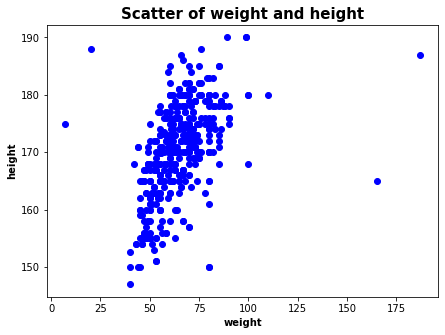

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))   # 顯示圖框架大小
plt.xlabel("weight", fontweight = "bold") #設定x座標標題及粗體
plt.ylabel("height", fontweight = "bold") #設定y座標標題及粗體
plt.title("Scatter of weight and height",
          fontsize = 15, fontweight = "bold") #設定標題、字大小及粗體

plt.scatter(x=cleaned_df['weight'],y=cleaned_df['height'],c='blue')

In [22]:
cleaned_df.dtypes

id              int64
timestamp      object
gender          int64
star_sign       int64
phone_os        int64
height        float64
weight        float64
sleepiness      int64
iq            float64
fb_friends    float64
yt             object
self_intro     object
dtype: object

In [23]:

cleaned_df['star_sign'] = cleaned_df['star_sign'].astype(str)
cleaned_df['phone_os'] = cleaned_df['phone_os'].astype(str)

In [24]:
cleaned_df.dtypes

id              int64
timestamp      object
gender          int64
star_sign      object
phone_os       object
height        float64
weight        float64
sleepiness      int64
iq            float64
fb_friends    float64
yt             object
self_intro     object
dtype: object

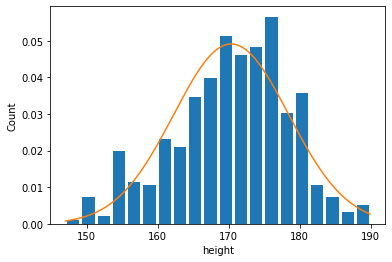

In [25]:
from scipy.stats import norm
import numpy as np
plt.hist(cleaned_df.height, bins=20, rwidth=0.8 ,density=True)
plt.xlabel('height')
plt.ylabel('Count')

rng=np.arange(cleaned_df.height.min(),cleaned_df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,cleaned_df.height.mean(),cleaned_df.height.std()))

In [26]:
cleaned_df.height.mean()

170.34677927927927

In [27]:
cleaned_df.height.std()

8.118839848396066

In [28]:
upper_limit_height=cleaned_df.height.mean()+3*cleaned_df.height.std()
print(upper_limit_height)
lower_limit_height=cleaned_df.height.mean()-3*cleaned_df.height.std()
print(lower_limit_height)

194.70329882446748
145.99025973409107


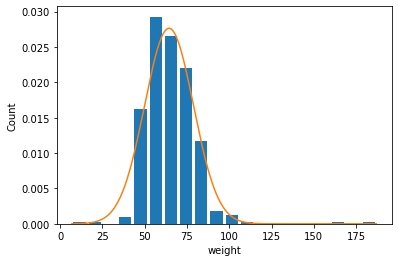

In [29]:
from scipy.stats import norm
import numpy as np
plt.hist(cleaned_df.weight, bins=20, rwidth=0.8 ,density=True)
plt.xlabel('weight')
plt.ylabel('Count')

rng=np.arange(cleaned_df.weight.min(),cleaned_df.weight.max(),0.1)
plt.plot(rng,norm.pdf(rng,cleaned_df.weight.mean(),cleaned_df.weight.std()))

In [30]:
print(cleaned_df.weight.mean())
print(cleaned_df.weight.std())


64.38709459459459
14.430933585028418


In [31]:
upper_limit_weight=cleaned_df.weight.mean()+2*cleaned_df.weight.std()
print(upper_limit_weight)
lower_limit_weight=cleaned_df.weight.mean()-2*cleaned_df.weight.std()
print(lower_limit_weight)

93.24896176465143
35.525227424537746


In [32]:
cleaned_df[(cleaned_df['height']< lower_limit_height) | (cleaned_df['height']>upper_limit_height) | (cleaned_df['weight']<lower_limit_weight) | (cleaned_df['weight']>upper_limit_weight)]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
126,127,20/12/2017 10:16:24,1,3,1,175.0,7.0,5,100.0,1000.0,0.06,I’m handsome
134,135,21/12/2017 10:09:53,1,6,1,190.0,99.0,1,50.0,2.0,5000,God Damon looser
190,191,21/12/2017 10:09:53,1,6,1,190.0,99.0,1,50.0,2.0,5000,God Damon looser
254,255,21/12/2017 19:12:11,1,10,2,168.0,100.0,3,87.0,300.0,1,Stupid
266,267,21/12/2017 19:12:33,-1,7,1,165.0,165.0,5,155.0,165.0,165,May God blessing you
269,270,21/12/2017 19:12:38,1,12,2,180.0,100.0,5,120.0,600.0,0,A man with wisdom.
277,278,21/12/2017 19:13:14,-1,4,1,180.0,100.0,3,180.0,0.0,10,I am a fat guy
306,307,21/12/2017 19:16:26,1,1,2,187.0,187.0,3,187.0,870.0,8.7,878787
310,311,08/03/2018 14:20:21,1,5,1,180.0,110.0,3,140.0,250.0,0.5,Stay hungry stay foolish
438,439,13/03/2018 10:01:04,-1,6,2,188.0,20.0,5,88.0,88.0,1.88,A young girl


In [33]:
cleaned_df['BMI']=cleaned_df['weight']/((cleaned_df['height']/100)*(cleaned_df['height']/100))
cleaned_df[0:10]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro,BMI
0,1,4/7/2017 13:47,-1,8,1,154.0,43.0,2,180.0,583.0,0,Beautiful,18.131219
1,2,4/7/2017 13:48,-1,8,1,156.0,47.0,2,130.0,400.0,3.5,Enjoying being who I'm notsss,19.312952
2,3,4/7/2017 13:49,1,11,2,170.0,61.0,3,90.0,540.0,5,Practice Makes perfect,21.107266
3,4,4/7/2017 13:49,1,11,1,170.0,62.0,4,100.0,173.0,5,Straightforward,21.453287
4,5,4/7/2017 13:54,-1,11,2,158.0,67.0,3,128.0,320.0,1.2,Humorous,26.838648
5,6,4/7/2017 13:55,-1,12,2,158.0,50.0,3,100.0,903.0,2,I am cute,20.028842
6,7,4/7/2017 13:56,1,9,2,165.0,50.0,4,115.0,209.0,9.59,Homo sapiens,18.365473
8,9,4/7/2017 13:57,-1,11,2,168.0,52.0,2,100.0,580.0,5.34,I am quite.,18.424036
9,10,4/7/2017 14:00,-1,3,1,165.0,55.0,5,130.0,542.0,2,Beautiful,20.202020
10,11,4/7/2017 14:01,-1,9,2,164.0,52.0,3,180.0,300.0,1,Beautiful and smart,19.333730


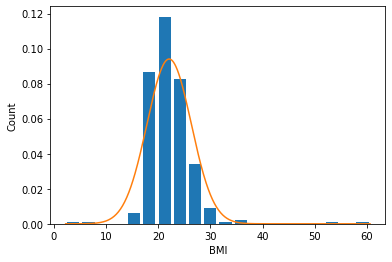

In [34]:
from scipy.stats import norm
import numpy as np
plt.hist(cleaned_df.BMI, bins=20, rwidth=0.8 ,density=True)
plt.xlabel('BMI')
plt.ylabel('Count')

rng=np.arange(cleaned_df.BMI.min(),cleaned_df.BMI.max(),0.1)
plt.plot(rng,norm.pdf(rng,cleaned_df.BMI.mean(),cleaned_df.BMI.std()))

In [35]:
print(cleaned_df.BMI.mean())
print(cleaned_df.BMI.std())

22.104972543169346
4.242371729426834


In [36]:
upper_limit_BMI=cleaned_df.BMI.mean()+2*cleaned_df.BMI.std()
print(upper_limit_BMI)
lower_limit_BMI=cleaned_df.BMI.mean()-2*cleaned_df.BMI.std()
print(lower_limit_BMI)

30.589716002023014
13.620229084315678


In [37]:
cleaned_df[(cleaned_df['BMI']< lower_limit_BMI) | (cleaned_df['BMI']>upper_limit_BMI)]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro,BMI
89,90,2/12/2017 13:39,-1,5,2,161.0,80.0,2,110.0,150.0,3,Happy,30.863007
126,127,20/12/2017 10:16:24,1,3,1,175.0,7.0,5,100.0,1000.0,0.06,I’m handsome,2.285714
254,255,21/12/2017 19:12:11,1,10,2,168.0,100.0,3,87.0,300.0,1,Stupid,35.430839
266,267,21/12/2017 19:12:33,-1,7,1,165.0,165.0,5,155.0,165.0,165,May God blessing you,60.606061
269,270,21/12/2017 19:12:38,1,12,2,180.0,100.0,5,120.0,600.0,0,A man with wisdom.,30.864198
277,278,21/12/2017 19:13:14,-1,4,1,180.0,100.0,3,180.0,0.0,10,I am a fat guy,30.864198
306,307,21/12/2017 19:16:26,1,1,2,187.0,187.0,3,187.0,870.0,8.7,878787,53.475936
310,311,08/03/2018 14:20:21,1,5,1,180.0,110.0,3,140.0,250.0,0.5,Stay hungry stay foolish,33.950617
396,397,08/03/2018 14:25:15,-1,9,2,150.0,80.0,3,85.0,2.0,1,Kindness,35.555556
397,398,08/03/2018 14:25:16,-1,9,2,150.0,80.0,3,85.0,2.0,1,Kindness,35.555556


In [38]:
cleaned_df_no_outleir=cleaned_df[(cleaned_df['BMI']> lower_limit_BMI) & (cleaned_df['BMI']<upper_limit_BMI)]

In [39]:
cleaned_df_no_outleir.shape

(433, 13)

In [40]:
#split training &. testing data
from sklearn.model_selection import train_test_split

y = cleaned_df_no_outleir.pop('gender') # this is our target label
X = cleaned_df_no_outleir # this is our 'data'

In [41]:
print(y)

0     -1
1     -1
2      1
3      1
4     -1
      ..
473    1
475    1
477   -1
478   -1
480    1
Name: gender, Length: 433, dtype: int64


In [42]:
print(X)

      id            timestamp star_sign phone_os  height  weight  sleepiness  \
0      1       4/7/2017 13:47         8        1   154.0    43.0           2   
1      2       4/7/2017 13:48         8        1   156.0    47.0           2   
2      3       4/7/2017 13:49        11        2   170.0    61.0           3   
3      4       4/7/2017 13:49        11        1   170.0    62.0           4   
4      5       4/7/2017 13:54        11        2   158.0    67.0           3   
..   ...                  ...       ...      ...     ...     ...         ...   
473  474  13/03/2018 10:17:06         5        1   166.0    65.0           1   
475  476  13/03/2018 10:17:40        10        1   169.0    60.0           4   
477  478  13/03/2018 10:18:29         5        2   180.0    88.0           5   
478  479  13/03/2018 10:19:40         2        2   158.0    56.0           3   
480  481  13/03/2018 12:03:21         9        2   176.0    60.0           3   

        iq  fb_friends   yt            

In [43]:
# carry out random split, where the test (validation) is 33%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
numeric_X_train = X_train.drop(columns=['id','timestamp','self_intro'])
numeric_X_test = X_test.drop(columns=['id','timestamp','self_intro'])

numeric_X_train[0:10]

,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,BMI
122,9,2,155.0,47.0,3,124.0,280.0,0.5,19.562955
213,6,2,180.0,66.0,2,180.0,0.0,0,20.370370
161,4,2,164.0,66.0,2,115.0,623.0,1,24.538965
216,12,2,161.0,50.0,2,120.0,150.0,0.5,19.289379
366,3,1,165.0,65.0,5,100.0,1000.0,3,23.875115
189,12,2,181.0,72.0,4,128.0,157.0,1.2,21.977351
95,6,2,155.0,50.0,4,180.0,300.0,0,20.811655
285,10,1,170.0,63.0,2,130.0,500.0,6,21.799308
373,4,2,166.0,55.0,3,120.0,555.0,6,19.959355
83,3,1,175.0,82.0,2,90.0,300.0,0.2,26.775510


In [45]:
from collections import Counter
print(Counter(y_train))

Counter({1: 215, -1: 75})


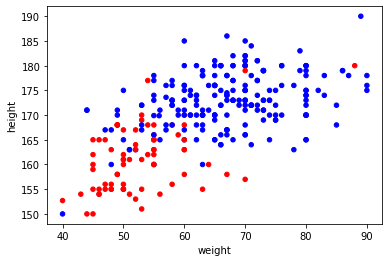

In [46]:
import numpy as np
import matplotlib.pyplot as plt
X_y_train = pd.concat([X_train, y_train], axis=1)

colors = np.where(X_y_train["gender"]==1,'b','-') 
colors[X_y_train["gender"]==-1] = 'r' 
X_y_train.plot.scatter(y='height', x='weight', c=colors)

In [47]:
X_y_train[0:10]

,id,timestamp,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro,BMI,gender
122,123,20/12/2017 10:06:49,9,2,155.0,47.0,3,124.0,280.0,0.5,Kind,19.562955,-1
213,214,21/12/2017 10:12:34,6,2,180.0,66.0,2,180.0,0.0,0,123,20.370370,1
161,162,21/12/2017 10:13:02,4,2,164.0,66.0,2,115.0,623.0,1,Always smile,24.538965,1
216,217,21/12/2017 10:12:52,12,2,161.0,50.0,2,120.0,150.0,0.5,Beautiful,19.289379,-1
366,367,08/03/2018 14:23:11,3,1,165.0,65.0,5,100.0,1000.0,3,cute,23.875115,1
189,190,21/12/2017 10:38:21,12,2,181.0,72.0,4,128.0,157.0,1.2,Takami Chika <3,21.977351,1
95,96,20/12/2017 10:03:24,6,2,155.0,50.0,4,180.0,300.0,0,Human.,20.811655,-1
285,286,21/12/2017 19:13:36,10,1,170.0,63.0,2,130.0,500.0,6,QQ,21.799308,1
373,374,08/03/2018 14:23:19,4,2,166.0,55.0,3,120.0,555.0,6,Liberator,19.959355,-1
83,84,2/12/2017 13:37,3,1,175.0,82.0,2,90.0,300.0,0.2,I'm so cute,26.775510,1


In [48]:
X_y_train.shape

(290, 13)

In [49]:
# pop some columns 
numeric_X_train = X_train.drop(columns=['id','timestamp','self_intro'])
numeric_X_test = X_test.drop(columns=['id','timestamp','self_intro'])

numeric_X_train[0:10]

,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,BMI
122,9,2,155.0,47.0,3,124.0,280.0,0.5,19.562955
213,6,2,180.0,66.0,2,180.0,0.0,0,20.370370
161,4,2,164.0,66.0,2,115.0,623.0,1,24.538965
216,12,2,161.0,50.0,2,120.0,150.0,0.5,19.289379
366,3,1,165.0,65.0,5,100.0,1000.0,3,23.875115
189,12,2,181.0,72.0,4,128.0,157.0,1.2,21.977351
95,6,2,155.0,50.0,4,180.0,300.0,0,20.811655
285,10,1,170.0,63.0,2,130.0,500.0,6,21.799308
373,4,2,166.0,55.0,3,120.0,555.0,6,19.959355
83,3,1,175.0,82.0,2,90.0,300.0,0.2,26.775510


In [50]:
# try to do PCA
# the first thing to do PCA is to do standard scaling 
# if the data is done with standardScaler, the mean will become 0 and std will become 1
# you can aslo import below sklearn tool
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [51]:
scaler=StandardScaler()
scaler.fit(numeric_X_train)

StandardScaler()

In [52]:
scaled_train_data=scaler.transform(numeric_X_train)

In [53]:
#need to ask how to explain this array ?
scaled_train_data

array([[ 0.74322993,  0.91402573, -1.93338571, ..., -0.43289737,
        -0.05884829, -0.76532047],
       [-0.13293543,  0.91402573,  1.28850163, ..., -1.00392415,
        -0.0588483 , -0.49544566],
       [-0.71704568,  0.91402573, -0.77350627, ...,  0.26661043,
        -0.05884828,  0.89788798],
       ...,
       [-1.0091008 ,  0.91402573, -1.16013275, ..., -0.59604788,
        -0.05884828, -0.46991878],
       [ 0.45117481, -1.0940611 , -0.25800429, ...,  0.21970466,
        -0.05884823, -0.909147  ],
       [ 0.15911969, -1.0940611 , -0.64463077, ..., -0.39210974,
        -0.05884829,  0.3076846 ]])

In [54]:
from sklearn. decomposition import PCA

In [55]:
# means you want to reduce multiple dimensions into what kind of level of dimensions
# n_components=2 , means to reduce to 2 dimensions
pca=PCA(n_components=2)

In [56]:
pca.fit(scaled_train_data)

PCA(n_components=2)

In [57]:
x_train_pca=pca.transform(scaled_train_data)

In [58]:
scaled_train_data.shape

(290, 9)

In [59]:
x_train_pca.shape

(290, 2)

In [60]:
scaled_train_data

array([[ 0.74322993,  0.91402573, -1.93338571, ..., -0.43289737,
        -0.05884829, -0.76532047],
       [-0.13293543,  0.91402573,  1.28850163, ..., -1.00392415,
        -0.0588483 , -0.49544566],
       [-0.71704568,  0.91402573, -0.77350627, ...,  0.26661043,
        -0.05884828,  0.89788798],
       ...,
       [-1.0091008 ,  0.91402573, -1.16013275, ..., -0.59604788,
        -0.05884828, -0.46991878],
       [ 0.45117481, -1.0940611 , -0.25800429, ...,  0.21970466,
        -0.05884823, -0.909147  ],
       [ 0.15911969, -1.0940611 , -0.64463077, ..., -0.39210974,
        -0.05884829,  0.3076846 ]])

In [61]:
x_train_pca

array([[ 2.20236987e+00,  1.15085908e+00],
       [-6.68335523e-01,  4.64718364e-01],
       [-2.51216962e-01,  8.95420732e-01],
       [ 1.74222221e+00,  1.97190908e+00],
       [-2.62324776e-02, -1.52521390e+00],
       [-1.34901190e+00,  8.56829392e-01],
       [ 1.66055512e+00, -3.37468845e-01],
       [ 1.42178707e-01,  3.47449664e-01],
       [ 1.10347004e+00,  3.87366222e-01],
       [-2.28196703e+00,  2.77655451e-01],
       [ 1.23968639e+00,  2.09082213e-01],
       [ 4.17012222e-01,  1.11919278e-01],
       [-2.09766813e+00,  2.23405915e-01],
       [ 7.56481715e-01,  1.21491700e+00],
       [-1.14950042e+00,  1.66683304e-01],
       [ 1.51357749e+00, -1.82200649e+00],
       [-9.13233872e-01, -6.45470924e-01],
       [-8.96326475e-01,  3.64255483e-01],
       [-7.63632286e-01, -8.07607508e-01],
       [-1.02523291e+00,  8.28784651e-01],
       [ 2.54577163e+00, -7.75614627e-02],
       [-1.25409503e+00,  2.13090870e+00],
       [ 1.58589298e+00, -8.07141739e-01],
       [-2.

Text(0, 0.5, 'second principle component')

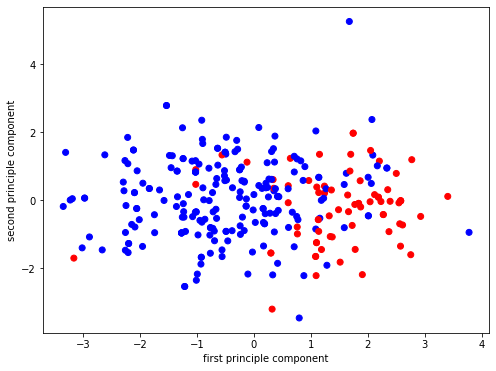

In [62]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
xTrainPCA0=x_train_pca[:,0]
xTrainPCA1=x_train_pca[:,1]

colors = np.where(X_y_train["gender"]==1,'b','-') 
colors[X_y_train["gender"]==-1] = 'r' 

plt.scatter(xTrainPCA0,xTrainPCA1,c=colors)
plt.xlabel('first principle component')
plt.ylabel('second principle component')

In [63]:
#Train some ML models on the training set
from sklearn.tree import DecisionTreeClassifier as dtree, export_graphviz
# initiate a Decision Tree with default parameters
dt = dtree()

# train a DT classifier with the training data
dt.fit(x_train_pca, y_train)


DecisionTreeClassifier()

In [64]:
# do PCA for numeric_X_test
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(numeric_X_test)

StandardScaler()

In [65]:
scaled_test_data=scaler.transform(numeric_X_test)

In [66]:
scaled_test_data

array([[ 1.48894856,  0.9258201 , -0.96286238, ..., -0.30066691,
        -0.16491306, -0.49894128],
       [ 0.37709663, -1.08012345,  0.24451503, ..., -0.22069363,
        -0.15902372, -0.25915119],
       [-0.45679231, -1.08012345, -1.92876431, ...,  1.22747131,
        -0.16000528, -0.61307118],
       ...,
       [-1.56864424,  0.9258201 , -1.80802657, ...,  0.65252822,
        -0.16491011,  0.66089199],
       [ 1.48894856, -1.08012345,  0.96894148, ...,  3.17276749,
        -0.15313439,  0.8297497 ],
       [ 0.93302259,  0.9258201 , -0.35917367, ..., -0.44116053,
        -0.16294995,  0.1612075 ]])

In [67]:
from sklearn. decomposition import PCA

In [68]:
pca=PCA(n_components=2)

In [69]:
pca.fit(scaled_test_data)

PCA(n_components=2)

In [70]:
x_test_pca=pca.transform(scaled_test_data)

In [71]:
x_test_pca.shape

(143, 2)

In [72]:
scaled_test_data.shape

(143, 9)

In [73]:
predicted_ans = dt.predict(x_test_pca)
print(predicted_ans)

[ 1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1 -1
  1  1  1  1 -1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1
  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1
  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1]


Average precision-recall score: 0.74


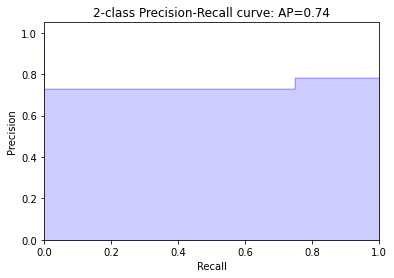

In [74]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [75]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(x_train_pca, y_train)

LinearSVC(random_state=0)

In [76]:
predicted_ans = clf.predict(x_test_pca)
predicted_ans

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1])

Average precision-recall score: 0.74


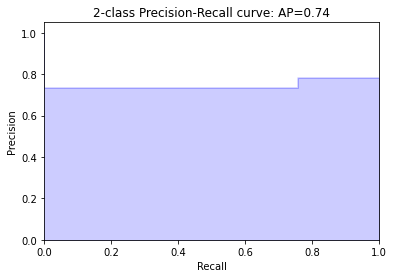

In [77]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()